In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os, sys
import pandas as pd
import numpy as np
from scipy import sparse
from scipy.ndimage.filters import gaussian_filter1d as gf1d
from scipy.spatial import distance as sd
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
sys.path.append(os.path.join(os.environ.get('HOME'), 'Code/python/ltm'))
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.path.dirname(os.getcwd())))
from figures.seqplots import plot_rep
from flow import Paths
from seq import ngram


In [4]:
Folder, _, _, Subjects = Paths.ExpData(fig_subfolder = 'rsa')

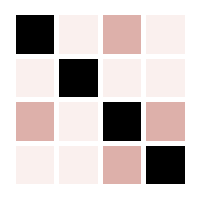

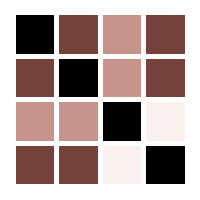

In [4]:
S = [[3, 0, 1, 2], [2, 3, 0, 1], [0, 1, 3, 2], [1, 2, 3, 0]]  # sequences as pos-item matrices
S = np.array(S)
D = 1- sd.cdist(S,S,'hamming')
C = ngram.rdm(S, 2)

fs = 3.2
sns.set(style="white")
cmap = sns.cubehelix_palette(10, start=1, rot=0, dark=0, light=.95)

# stim rdm: hamming
f, ax = plt.subplots(figsize=(fs, fs))
sns.heatmap(D, cmap=cmap, vmax=1, center=1/2, cbar=False,
        xticklabels=False, yticklabels=False, 
        square=True, linewidths=4)
plot_name = 'stim_rdm_hamming.pdf'
#f.savefig(os.path.join(Folder['Fig'], plot_name))

# stim rdm: chunks: 2-gram
f, ax = plt.subplots(figsize=(fs, fs))
sns.heatmap(C, cmap=cmap, vmax=1, center=1/2, cbar=False,
        xticklabels=False, yticklabels=False, 
        square=True, linewidths=4)
plot_name = 'stim_rdm_2gram.pdf'
#f.savefig(os.path.join(Folder['Fig'], plot_name))

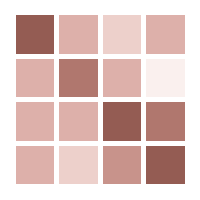

In [5]:
# voxel rdm
sigma = 8.
cmap = sns.cubehelix_palette(10, start=1, rot=0, dark=0, light=.95)
f, ax = plt.subplots(figsize=(fs, fs))
V = gf1d(D, sigma=sigma/10, mode='wrap')
sns.heatmap(V, cmap=cmap, vmax=1, center=1/2, cbar=False,
        xticklabels=False, yticklabels=False, 
        square=True, linewidths=4)
plot_name = 'voxel_rdm_' + str(sigma) + '.pdf'
#f.savefig(os.path.join(Folder['Fig'], plot_name))

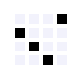

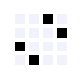

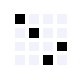

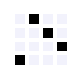

In [6]:
%autoreload seq.seqrep
sigma = 1.
cmap = sns.cubehelix_palette(10, start=0, rot=0, dark=0, light=.95)

for i, s in enumerate(S):
    l = len(s)
    # sequence matrix
    M = sparse.coo_matrix((np.ones(l), (np.arange(l), s)), shape=(l, l))
    # add noise
    R = gf1d(M.todense(), sigma=sigma/10, mode='wrap', axis=1)
    f, ax = plt.subplots(figsize=(1, 1))
    sns.heatmap(R, cmap=cmap, vmax=1, center=0.5,
        xticklabels=False, yticklabels=False, cbar=False,
        linewidths=3)
    plot_name = str(i+1) + '.pdf'
    #f.savefig(os.path.join(Folder['Fig'], plot_name))


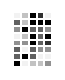

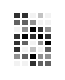

In [7]:
# random voxel patterns
r = 8
c = 5
P = [np.random.rand(r,c), np.random.rand(r,c)]
cmap = sns.light_palette("black")
for i, p in enumerate(P):
    f, ax = plt.subplots(figsize=(0.7, 1))
    sns.heatmap(p, cmap=cmap, vmax=1, center=1/2, cbar=False,
    xticklabels=False, yticklabels=False, 
    square=False, linewidths=1)
    plot_name = 'voxel_pattern_' + str(i+1) + '.pdf'
    #f.savefig(os.path.join(Folder['Fig'], plot_name))